# The Perceptron Model

As discussed in the README file, the perceptron is a single neuron model for **binary classification**. 
Below, we import the necessary packages for this model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

# Part 1: Data Processing
I trained my model with the Palmer Penguins dataset. 

In [2]:
df = pd.read_csv("palmer_penguins.csv")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


One aspect of this particular dataset is that a few rows contain the term "NaN" rather than a decimal value. Within the restricted domain of the first 200 sepcimens, this only occured once, so I simply applied the "drop" method to the 3rd index. However, were this a larger dataset, I could have used a more comlicated boolean condition in the drop method, such as having the program drop the index if bill length is NaN.

In [18]:
y = df.iloc[0:220].drop(index=3).species.values
y = np.where(y == 'Adelie', -1, 1)
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[:220].drop(index=3).values

## Part 2: Creating the Perceptron
Now we will define the Perceptron class, choosing a default leanring rate (0.5) and number of epochs (50). Within this class, we will define the train method, which adjusts the weights in response to the error (the difference between the precidtion and target values).

In [19]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] = update
                errors += int(update != 0)
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

Next we will train the perceptron, using 1500 epochs.

In [20]:
percep = Perceptron(epochs = 1_500)
percep.train(X, y)

## Part 3: Visualizing the Data

We will now create the plot with the linear separator provided by the model.

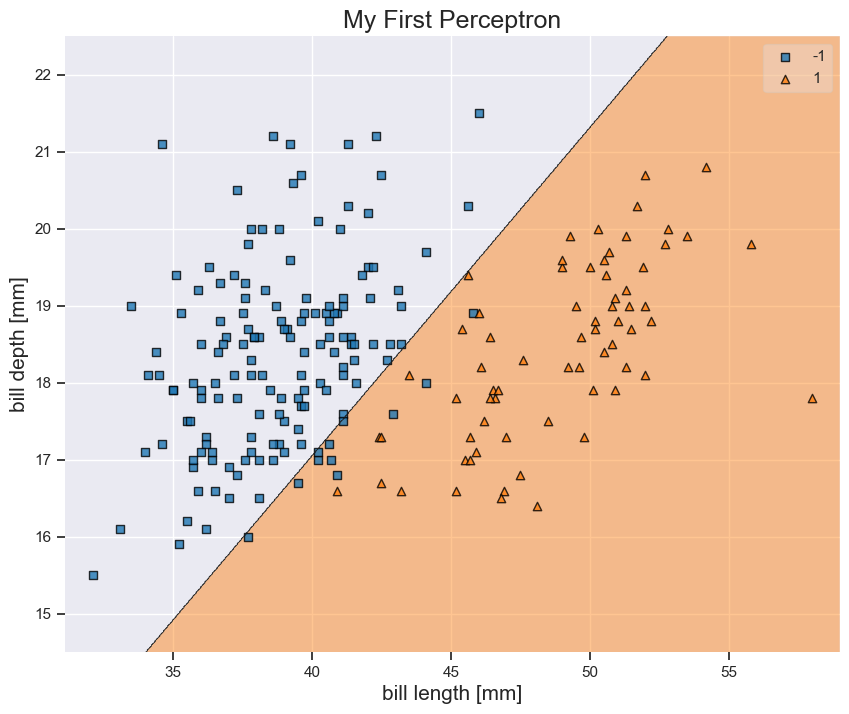

In [21]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

The plot appears rather messy and not cleanly separated, though not entirely random either. I experimented with more epochs, however this did not seem to reduce the misclassifications of the model.

We will now create a plot showing the number of misclassifications as a function of the iterations. From this visualization, we can observe that there is little to no correlation between the number of epochs and the number of errors, suggesting that the data is **not** linearly separable.

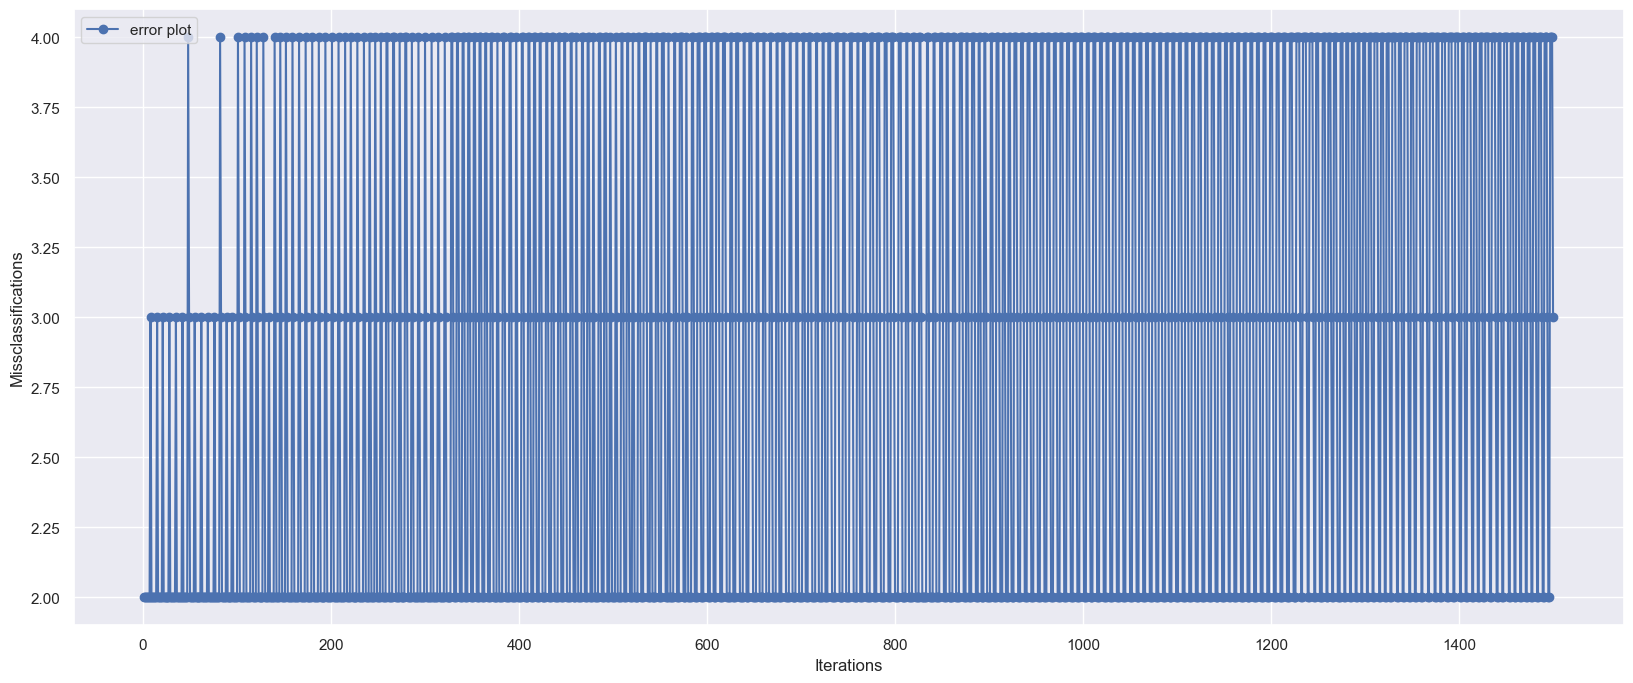

In [22]:
plt.figure(figsize = (20, 8))
plt.plot(range(1,len(percep.errors_)+1), percep.errors_,
              marker = "o",
              label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

**Conclusion**

The perceptron is clearly adept at classifying the data- as shown in the plot above, the number of errors in a given epoch ranges from 2 to 4, but never goes higher. However, the data is not linearly separable.

Out of curioustiy, I attempted to train the perceptron on different characterstics, such as body mass or flipper length, but found these to be even less cleanly divisible than bill length and depth.

Finally, this dataset provides a good example of the limmitations of the perceptron model- namely the confinement to binary classification.